#**Entendimento dos Dados:**


1. Na distribuição dos atributos é possível identificar o comportamento de cada uma das características analisadas
2. A análise estatística univariada analisa a distribuição e dispersão dos dados: a análise da distribuição de frequências e a análise das medidas de localização, dispersão, assimetria e curtose dos dados.
3.  Na avaliação estatística da causalidade, convencionou-se descrever essas análises bivariadas como formas de investigar se a variação de uma característica pode ser explicada pela variação de outra medida.
4.  Análise multivariada é uma ferramenta que encontra padrões e relações entre várias variáveis, permitindo prever efeitos e mudanças que uma variável terá sobre a outra.
5.  Detecção de valores ausentes é uma tarefa comum na área de ciência de dados para mensurar os impactos dessa ausência no conjunto de dados em estudo.
6.  A detecção de outliers consiste na identificação de padrões em dados com um comportamento diferente do esperado. Estes padrões são muitas vezes referidos como anomalias.
7.  Em probabilidade e estatística, correlação, dependência ou associação é qualquer relação estatística entre duas ou mais variáveis.
8.  Os métodos de seleção de características têm a missão de encontrar uma combinação adequada de características relevantes para o aprendizado de um conceito.

#**Importações:**

In [2]:
# instalando libs externas
!pip install prince
!pip install circlify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 5.9 MB/s eta 0:00:00


In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importações
import math
import prince
import circlify
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from IPython.display import display

In [4]:
#Carregando os dados e o dicionario
df = pd.read_csv('/content/dados_processed.csv', sep=';')
dicionario = pd.read_csv('/content/dicionario (2).csv', sep=';')


#**Analise univariada:**

##**Caracteristicas Nominais**

In [5]:
nominal_columns = dicionario.query('type=="nominal"').variavel.to_list()
nominal_columns

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
#criando um loop passando por cada coluna
for coluna in nominal_columns:

  ## Configurando estilo
  sns.set_style("whitegrid")

  ## Gerando gráfico
  ax = sns.barplot(x=df[coluna].value_counts().values[:10],y=df[coluna].value_counts().index[:10], color='#183EFF',alpha=1)

  ## Definindo tamanho do gráfico
  ax.figure.set_size_inches(25, 8)

  ## Personalizando valores absolutos e relativos
  total = float(df[coluna].value_counts().values.sum())
  for i in ax.containers:
      widths = [j.get_width() for j in i]
      total = sum(widths)
      ax.bar_label(i, label_type='edge', labels=[f"{width:.0f}\n{width/total:.2%}" for width in widths])

  ## Adicionando linha representando o valor médio
  ax.axvline(df[coluna].value_counts().values.mean(), color="#FFD000", clip_on=False,ls='dashed')

  ## Mantendo apenas as bordas da esquerda e da borda inferior
  sns.despine(left=True)

  ## Adicionando linha para destacar o eixo y na posição 0
  ax.axvline(0, color="k", clip_on=False,lw=5)

  ## Adicionando títulos
  plt.title('Analise univariada')
  plt.xlabel('Quantidade de registros')
  plt.ylabel('')

  ## Salvando figura
  fig = ax.get_figure()
  fig.savefig('imagens/uni_nominal-'+coluna+'.png',bbox_inches='tight')
  plt.close(fig)

##**Variaveis discretas**

In [6]:
discreta_columns = dicionario.query('type=="discreta"').variavel.to_list()
discreta_columns

['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

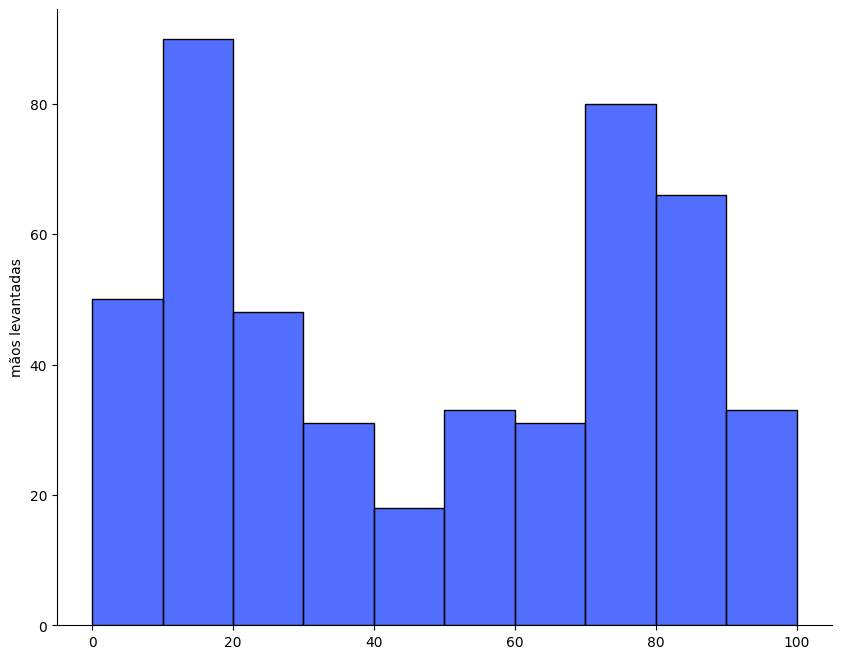

In [15]:
# Gerando gráfico de dispersão vezes que levantam as maos
## Gerando gráfico
ax = sns.histplot(data=df,x='raisedhands',color='#183EFF')

## Definindo tamanho do gráfico
ax.figure.set_size_inches(10, 8)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=False)

## Adicionando títulos
plt.title('')
plt.xlabel('')
plt.ylabel('mãos levantadas')

## Salvando figura
fig = ax.get_figure()
fig.savefig('imagens/univariada-discreta-dispersão-body_mass_g.png',bbox_inches='tight')

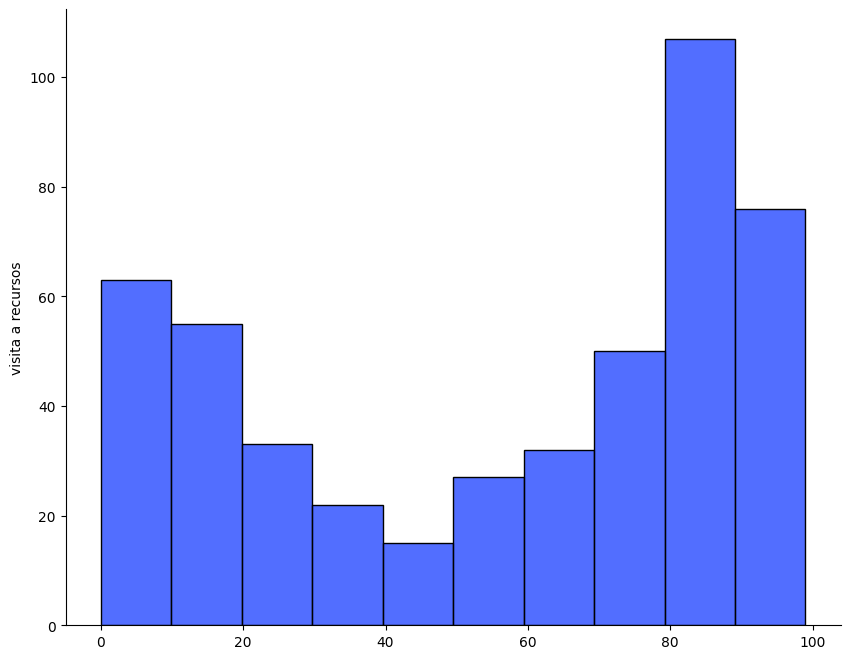

In [16]:
# Gerando gráfico de dispersão vezes que levantam as maos
## Gerando gráfico
ax = sns.histplot(data=df,x='VisITedResources',color='#183EFF')

## Definindo tamanho do gráfico
ax.figure.set_size_inches(10, 8)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=False)

## Adicionando títulos
plt.title('')
plt.xlabel('')
plt.ylabel('visita a recursos')

## Salvando figura
fig = ax.get_figure()
fig.savefig('imagens/univariada-discreta-dispersão-body_mass_g.png',bbox_inches='tight')

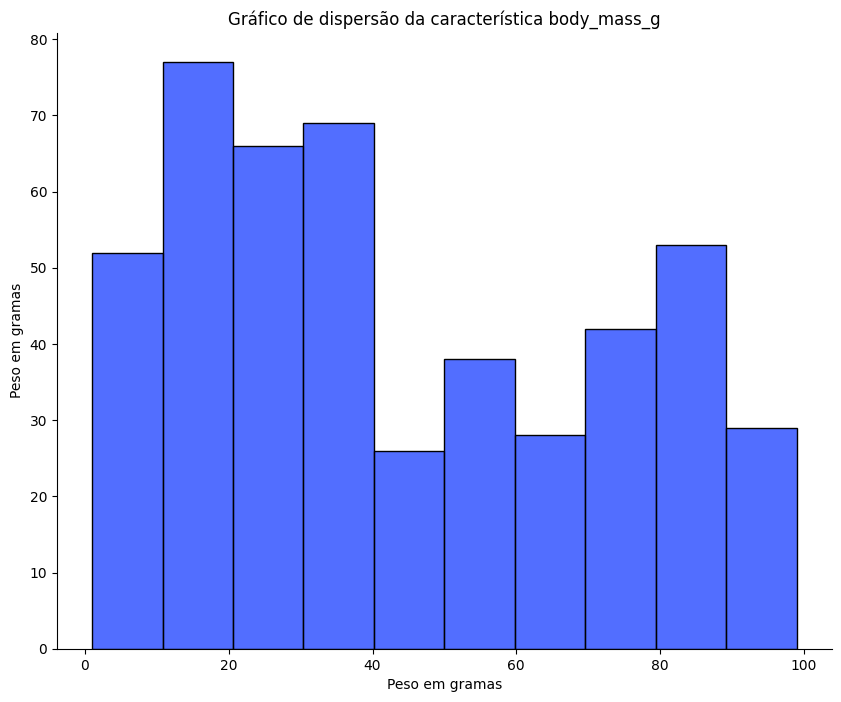

In [17]:
# Gerando gráfico de dispersão vezes que levantam as maos
## Gerando gráfico
ax = sns.histplot(data=df,x='Discussion',color='#183EFF')

## Definindo tamanho do gráfico
ax.figure.set_size_inches(10, 8)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=False)

## Adicionando títulos
plt.title('Gráfico de dispersão da característica body_mass_g')
plt.xlabel('Peso em gramas')
plt.ylabel('Peso em gramas')

## Salvando figura
fig = ax.get_figure()
fig.savefig('imagens/univariada-discreta-dispersão-body_mass_g.png',bbox_inches='tight')

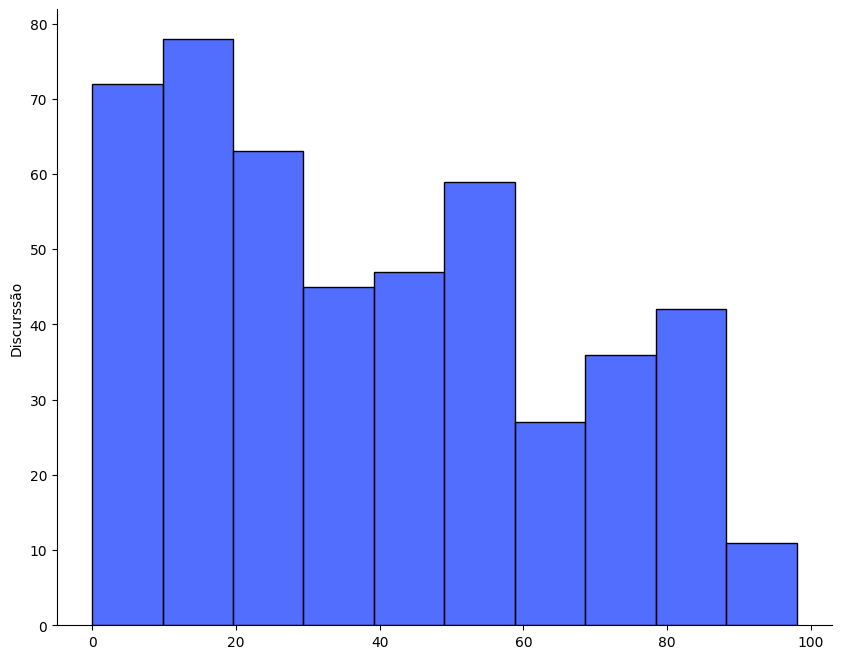

In [18]:
# Gerando gráfico visita nos recursos
## Gerando gráfico
ax = sns.histplot(data=df,x='AnnouncementsView',color='#183EFF')

## Definindo tamanho do gráfico
ax.figure.set_size_inches(10, 8)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=False)

## Adicionando títulos
plt.title('')
plt.xlabel('')
plt.ylabel('Discurssão')

## Salvando figura
fig = ax.get_figure()
fig.savefig('imagens/univariada-discreta-dispersão-body_mass_g.png',bbox_inches='tight')

In [19]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [20]:
# Crie uma tabela de contingência entre "Class" e "Gênero"
tabela_contingencia = pd.crosstab(df['Class'], df['gender'])

# Exiba a tabela de contingência
print(tabela_contingencia)


gender        MAN  WOMAN
Class                   
HIGH-LEVEL     67     75
LOW-LEVEL     103     24
MIDDLE-LEVEL  135     76


#**Analise Bivariada:**

##**Nominal x nominal**

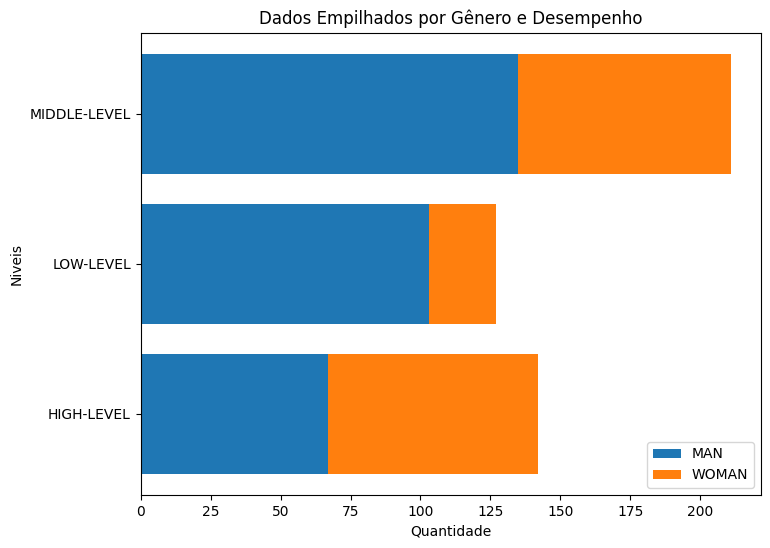

In [ ]:
tabela_contingencia = pd.crosstab(df['Class'], df['gender'])
tabela_contingencia.reset_index(inplace = True)

categorias = tabela_contingencia['Class'].unique()
homem_valores = tabela_contingencia.MAN
mulher_valores = tabela_contingencia.WOMAN
plt.figure(figsize=(8, 6))
plt.barh(categorias, homem_valores, label="MAN")
plt.barh(categorias, mulher_valores, left=homem_valores, label="WOMAN")
plt.xlabel("Quantidade")
plt.ylabel("Niveis")
plt.legend()
plt.title("Dados Empilhados por Gênero e Desempenho")
plt.show()

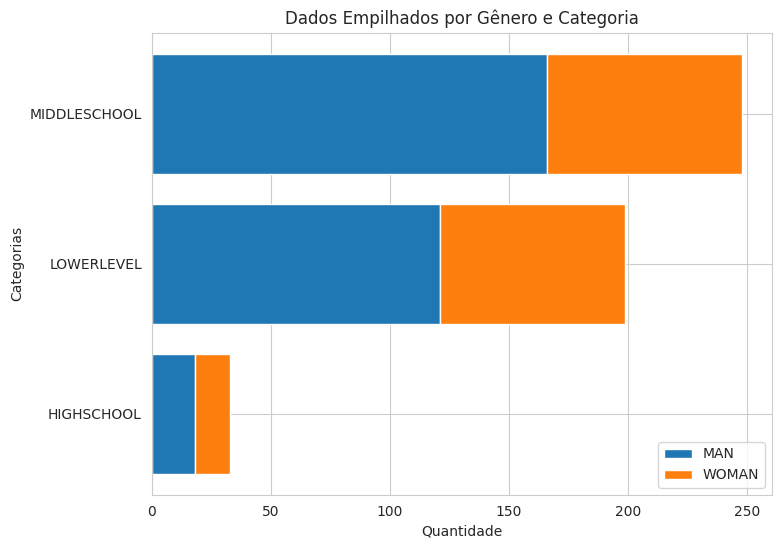

In [ ]:
#criando tabela entre as colunas
tabela_contingencia = pd.crosstab(df['StageID'], df['gender'])
tabela_contingencia.reset_index(inplace = True)

categorias = tabela_contingencia['StageID'].unique()
homem_valores = tabela_contingencia.MAN
mulher_valores = tabela_contingencia.WOMAN



plt.figure(figsize=(8, 6))
plt.barh(categorias, homem_valores, label="MAN")
plt.barh(categorias, mulher_valores, left=homem_valores, label="WOMAN")
plt.xlabel("Quantidade")
plt.ylabel("Categorias")
plt.legend()
plt.title("Dados Empilhados por Gênero e Categoria")
plt.show()

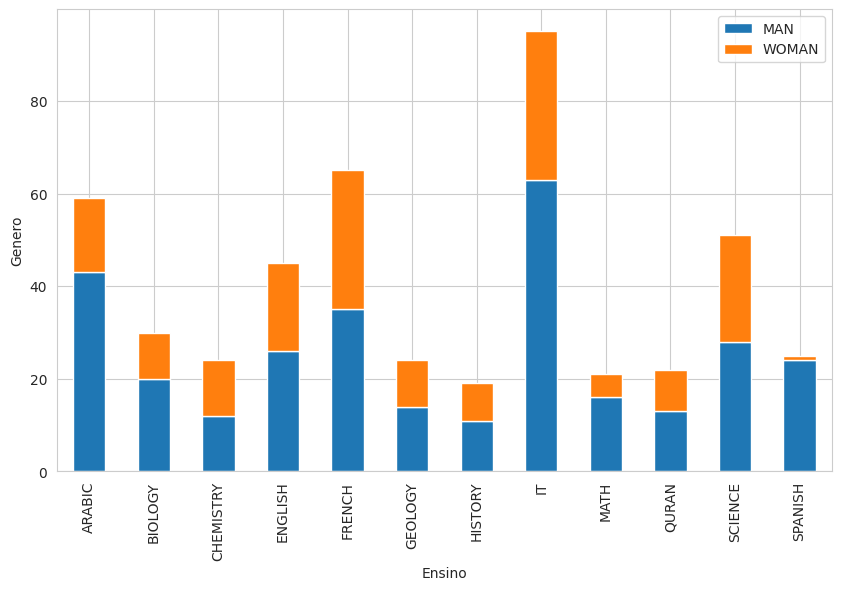

In [ ]:
#criando tabela entre as colunas
tabela_contingencia = pd.crosstab(df['Topic'], df['gender'])

# Criando gráfico de barras
tabela_contingencia.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizando o sgráficos
plt.title('')
plt.xlabel('Ensino')
plt.ylabel('Genero')
plt.legend(title='')
# Exiba o gráfico
plt.show()

## a maioria dos alunos se matricularam em TI

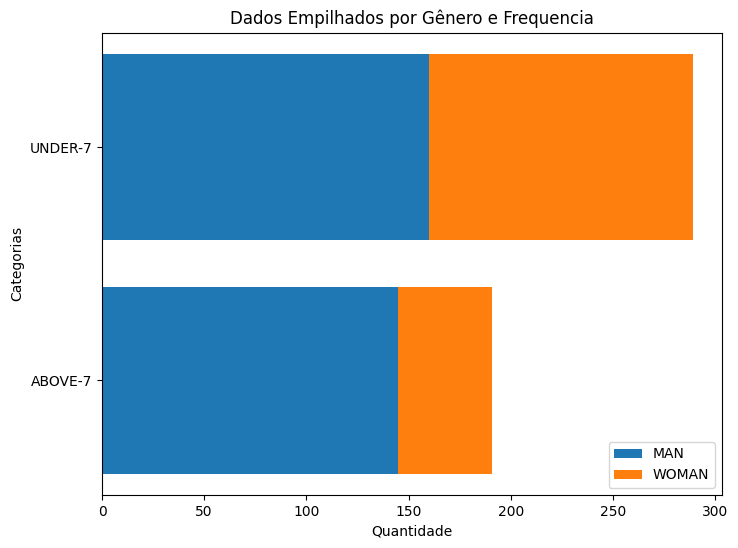

In [ ]:
#criando tabela entre as colunas
tabela_contingencia = pd.crosstab(df['StudentAbsenceDays'], df['gender'])
tabela_contingencia.reset_index(inplace = True)

categorias = tabela_contingencia['StudentAbsenceDays'].unique()
homem_valores = tabela_contingencia.MAN
mulher_valores = tabela_contingencia.WOMAN



plt.figure(figsize=(8, 6))
plt.barh(categorias, homem_valores, label="MAN")
plt.barh(categorias, mulher_valores, left=homem_valores, label="WOMAN")
plt.xlabel("Quantidade")
plt.ylabel("Categorias")
plt.legend()
plt.title("Dados Empilhados por Gênero e Frequencia")
plt.show()

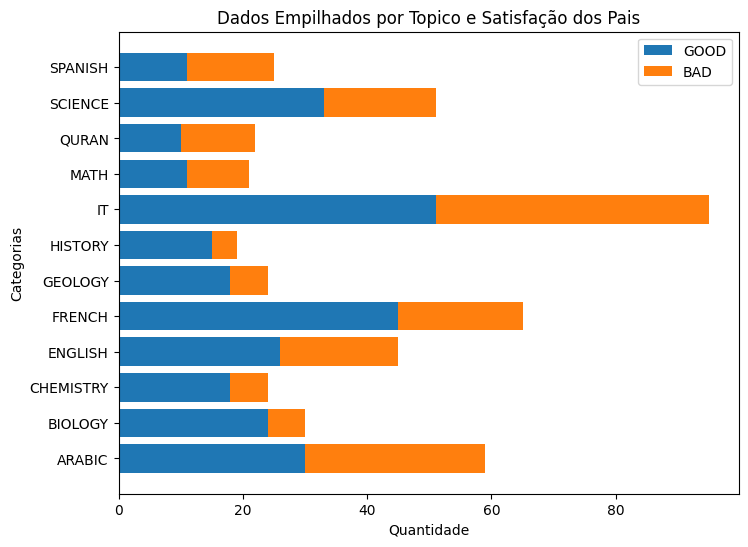

In [ ]:
tabela_contingencia = pd.crosstab(df['Topic'], df['ParentschoolSatisfaction'])
tabela_contingencia.reset_index(inplace = True)

categorias = tabela_contingencia['Topic'].unique()
boa_avaliacao = tabela_contingencia.GOOD
ma_avaliacao = tabela_contingencia.BAD



plt.figure(figsize=(8, 6))
plt.barh(categorias, boa_avaliacao, label="GOOD")
plt.barh(categorias, ma_avaliacao, left=boa_avaliacao, label="BAD")
plt.xlabel("Quantidade")
plt.ylabel("Categorias")
plt.legend()
plt.title("Dados Empilhados por Topico e Satisfação dos Pais")
plt.show()

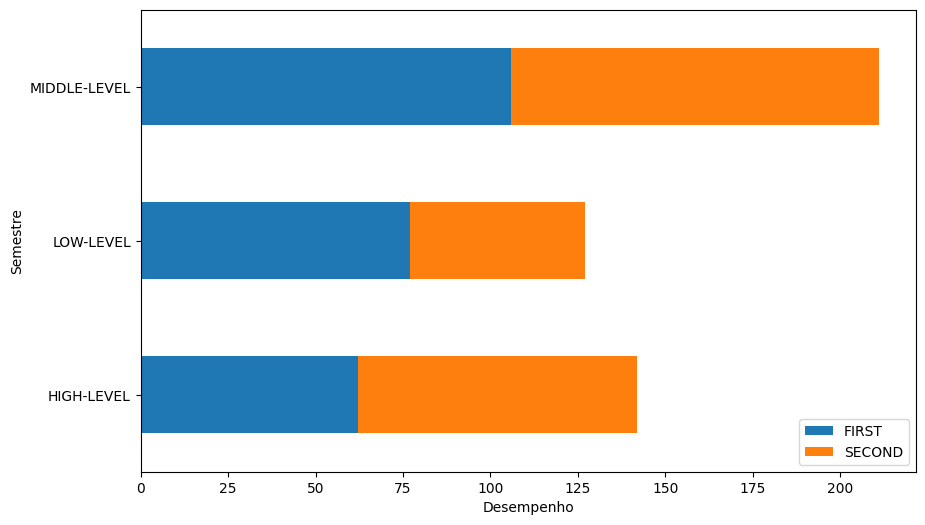

In [ ]:
tabela_contingencia = pd.crosstab(df['Class'], df['Semester'])

# Criando gráfico de barras
tabela_contingencia.plot(kind='barh', stacked=True, figsize=(10, 6))

# Personalizando o gráfico
plt.title('')
plt.xlabel('Desempenho')
plt.ylabel('Semestre')
plt.legend(title='')

# Exiba o gráfico
plt.show()


#**nominal x discreta:**

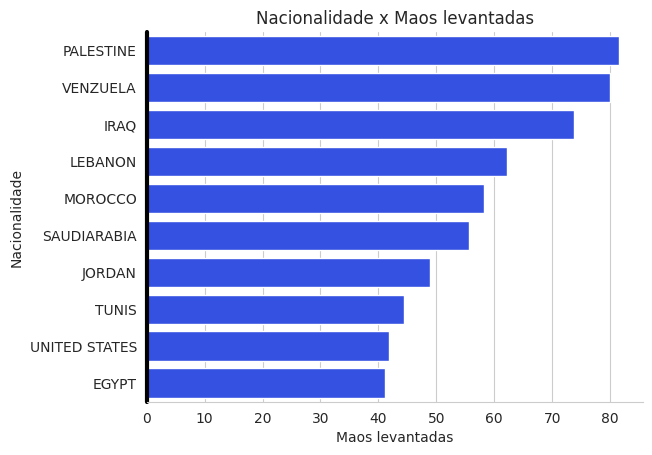

In [ ]:
# Nacionalidade x Maos levantadas
bivariada = df.groupby('NationalITy')['raisedhands'].mean().reset_index()
bivariada.sort_values(by='raisedhands',inplace=True,ascending=False)

## Configurando estilo
sns.set_style("whitegrid")

## Gerando gráfico bivariada
ax = sns.barplot(x=bivariada['raisedhands'][:10],y=bivariada['NationalITy'][:10], color='#183EFF',alpha=1)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=True)

## Adicionando linha para destacar o eixo y na posição 0
ax.axvline(0, color="k", clip_on=False,lw=3)

## Adicionando títulos
plt.title('Nacionalidade x Maos levantadas')
plt.xlabel('Maos levantadas')
plt.ylabel('Nacionalidade')

## Salvando figura
fig = ax.get_figure()


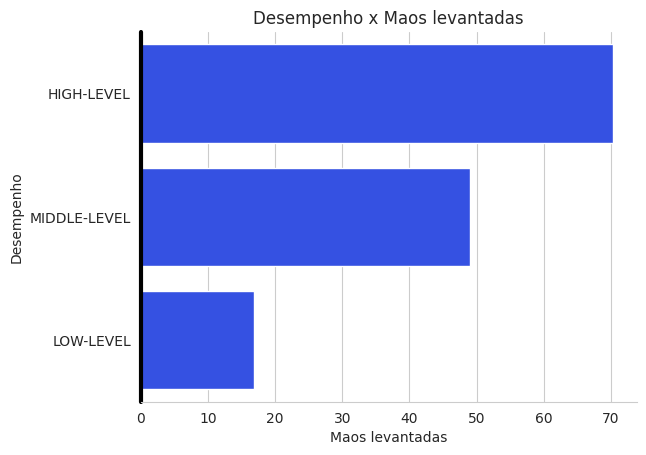

In [ ]:
# Nacionalidade x Maos levantadas
bivariada = df.groupby('Class')['raisedhands'].mean().reset_index()
bivariada.sort_values(by='raisedhands',inplace=True,ascending=False)

## Configurando estilo
sns.set_style("whitegrid")

## Gerando gráfico bivariada
ax = sns.barplot(x=bivariada['raisedhands'][:10],y=bivariada['Class'][:10], color='#183EFF',alpha=1)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=True)

## Adicionando linha para destacar o eixo y na posição 0
ax.axvline(0, color="k", clip_on=False,lw=3)

## Adicionando títulos
plt.title('Desempenho x Maos levantadas')
plt.xlabel('Maos levantadas')
plt.ylabel('Desempenho')

## Salvando figura
fig = ax.get_figure()

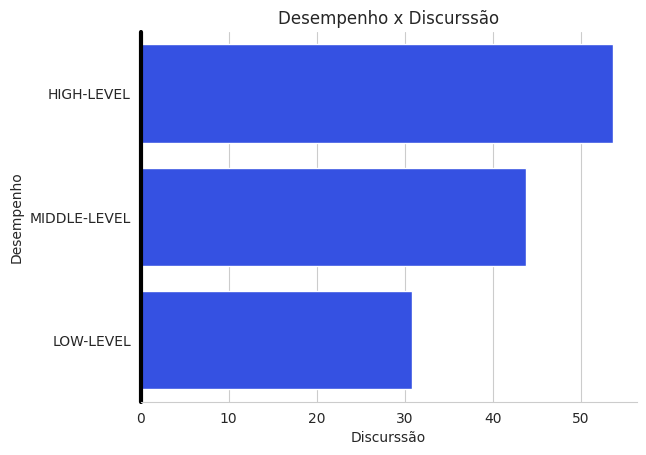

In [ ]:
# Nacionalidade x Maos levantadas
bivariada = df.groupby('Class')['Discussion'].mean().reset_index()
bivariada.sort_values(by='Discussion',inplace=True,ascending=False)

## Configurando estilo
sns.set_style("whitegrid")

## Gerando gráfico bivariada
ax = sns.barplot(x=bivariada['Discussion'][:10],y=bivariada['Class'][:10], color='#183EFF',alpha=1)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=True)

## Adicionando linha para destacar o eixo y na posição 0
ax.axvline(0, color="k", clip_on=False,lw=3)

## Adicionando títulos
plt.title('Desempenho x Discurssão')
plt.xlabel('Discurssão')
plt.ylabel('Desempenho')

## Salvando figura
fig = ax.get_figure()

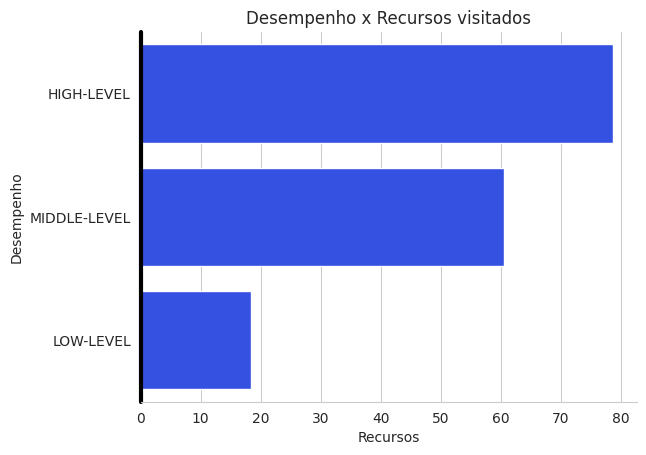

In [ ]:
# Nacionalidade x Maos levantadas
bivariada = df.groupby('Class')['VisITedResources'].mean().reset_index()
bivariada.sort_values(by='VisITedResources',inplace=True,ascending=False)

## Configurando estilo
sns.set_style("whitegrid")

## Gerando gráfico bivariada
ax = sns.barplot(x=bivariada['VisITedResources'][:10],y=bivariada['Class'][:10], color='#183EFF',alpha=1)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=True)

## Adicionando linha para destacar o eixo y na posição 0
ax.axvline(0, color="k", clip_on=False,lw=3)

## Adicionando títulos
plt.title('Desempenho x Recursos visitados')
plt.xlabel('Recursos')
plt.ylabel('Desempenho')

## Salvando figura
fig = ax.get_figure()

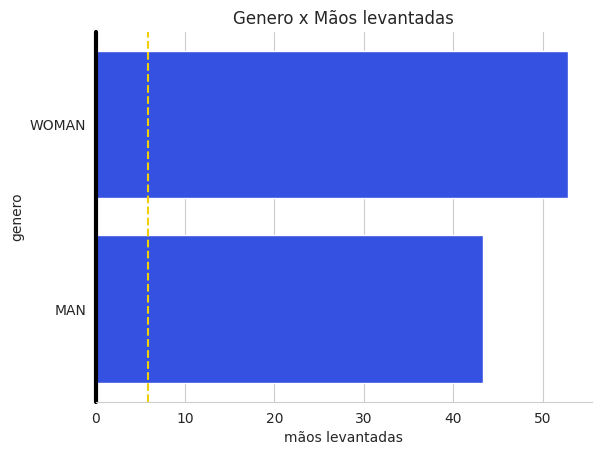

In [ ]:
# gender x raisedhands
bivariada = df.groupby('gender')['raisedhands'].mean().reset_index()
bivariada.sort_values(by='raisedhands',inplace=True,ascending=False)

## Configurando estilo
sns.set_style("whitegrid")

## Gerando gráfico bivariada
ax = sns.barplot(x=bivariada['raisedhands'][:10],y=bivariada['gender'][:10], color='#183EFF',alpha=1)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=True)

## Adicionando linha para destacar o eixo y na posição 0
ax.axvline(0, color="k", clip_on=False,lw=3)
ax.axvline(df['raisedhands'].value_counts().values.mean(), color="#EFD006", clip_on=False,ls='dashed')


## Adicionando títulos
plt.title('Genero x Mãos levantadas')
plt.xlabel('mãos levantadas')
plt.ylabel('genero')

## Salvando figura
fig = ax.get_figure()



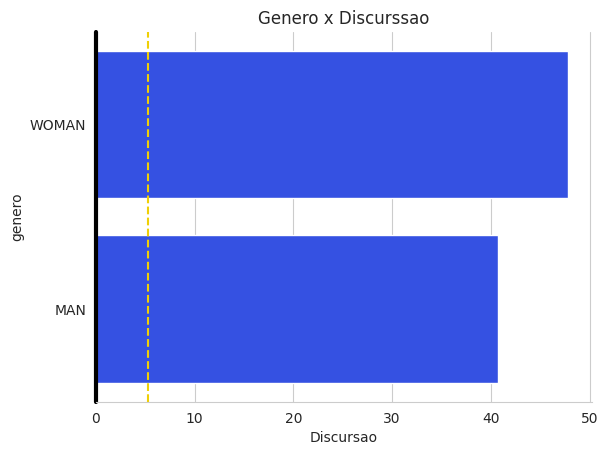

In [ ]:
# gender x raisedhands
bivariada = df.groupby('gender')['Discussion'].mean().reset_index()
bivariada.sort_values(by='Discussion',inplace=True,ascending=False)

## Configurando estilo
sns.set_style("whitegrid")

## Gerando gráfico bivariada
ax = sns.barplot(x=bivariada['Discussion'][:10],y=bivariada['gender'][:10], color='#183EFF',alpha=1)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=True)

## Adicionando linha para destacar o eixo y na posição 0
ax.axvline(0, color="k", clip_on=False,lw=3)
ax.axvline(df['Discussion'].value_counts().values.mean(), color="#EFD006", clip_on=False,ls='dashed')


## Adicionando títulos
plt.title('Genero x Discurssao')
plt.xlabel('Discursao')
plt.ylabel('genero')

## Salvando figura
fig = ax.get_figure()



Text(0, 0.5, 'genero')

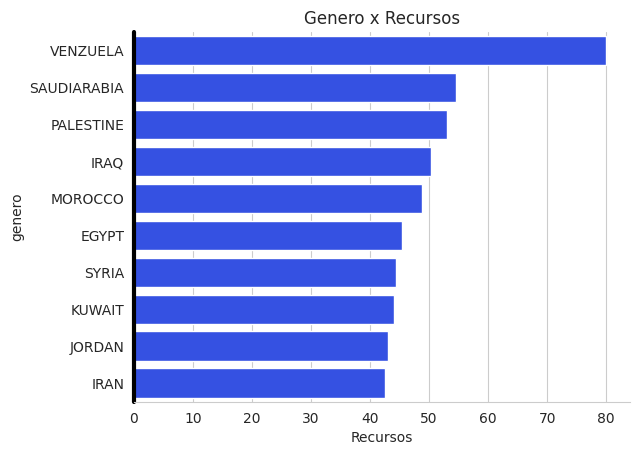

In [ ]:
# Nacionalidade x Discursao
bivariada = df.groupby('NationalITy')['Discussion'].mean().reset_index()
bivariada.sort_values(by='Discussion',inplace=True,ascending=False)

## Configurando estilo
sns.set_style("whitegrid")

## Gerando gráfico bivariada
ax = sns.barplot(x=bivariada['Discussion'][:10],y=bivariada['NationalITy'][:10], color='#183EFF',alpha=1)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=True)

## Adicionando linha para destacar o eixo y na posição 0
ax.axvline(0, color="k", clip_on=False,lw=3)

## Adicionando títulos
plt.title('Genero x Recursos')
plt.xlabel('Recursos')
plt.ylabel('genero')

Text(0, 0.5, 'satisfacao')

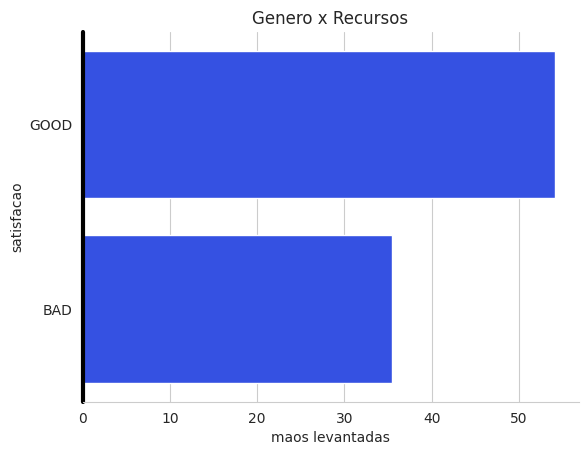

In [ ]:
# Nacionalidade x Discursao
bivariada = df.groupby('ParentschoolSatisfaction')['raisedhands'].mean().reset_index()
bivariada.sort_values(by='raisedhands',inplace=True,ascending=False)

## Configurando estilo
sns.set_style("whitegrid")

## Gerando gráfico bivariada
ax = sns.barplot(x=bivariada['raisedhands'][:10],y=bivariada['ParentschoolSatisfaction'][:10], color='#183EFF',alpha=1)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=True)

## Adicionando linha para destacar o eixo y na posição 0
ax.axvline(0, color="k", clip_on=False,lw=3)

## Adicionando títulos
plt.title('Genero x Recursos')
plt.xlabel('maos levantadas')
plt.ylabel('satisfacao')

Text(0, 0.5, 'satisfacao')

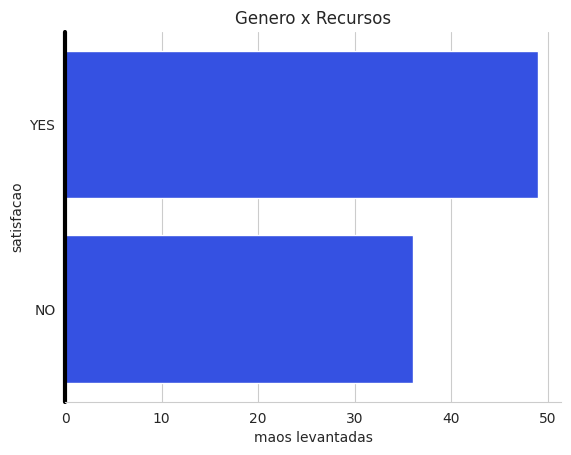

In [ ]:
# Resposta x Discursao
bivariada = df.groupby('ParentAnsweringSurvey')['Discussion'].mean().reset_index()
bivariada.sort_values(by='Discussion',inplace=True,ascending=False)

## Configurando estilo
sns.set_style("whitegrid")

## Gerando gráfico bivariada
ax = sns.barplot(x=bivariada['Discussion'][:10],y=bivariada['ParentAnsweringSurvey'][:10], color='#183EFF',alpha=1)

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=True)

## Adicionando linha para destacar o eixo y na posição 0
ax.axvline(0, color="k", clip_on=False,lw=3)

## Adicionando títulos
plt.title('Genero x Recursos')
plt.xlabel('maos levantadas')
plt.ylabel('satisfacao')

#**Analise multivariada**

In [ ]:
df.Class.value_counts()

MIDDLE-LEVEL    211
HIGH-LEVEL      142
LOW-LEVEL       127
Name: Class, dtype: int64

In [ ]:
nominal_columns[0+1]

'NationalITy'

In [ ]:
# Criando uma função para calcular a distância euclidiana entre os pontos
def euclidean_distance(px, qx, py, qy):
    return math.sqrt(((px - qx) ** 2) + ((py - qy) ** 2))

In [ ]:
nominal_columns

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

In [ ]:
for p in range(len(nominal_columns)):

    for k in range(p+1, len(nominal_columns)):

        if nominal_columns[p] != nominal_columns[k]:
            # Criando tabela de contigência
            contingencia = pd.crosstab(df[nominal_columns[p]], df[nominal_columns[k]], margins = True)
            contingencia.drop(['All'], axis = 1, inplace = True)
            contingencia.drop(['All'], axis = 0, inplace = True)

            if contingencia.shape[0] > 2 and contingencia.shape[1] > 2:

              # Aplicando o cca
              cca = prince.CA(n_components = 2)
              modelcca = cca.fit(contingencia)

              #Criando uma matrix de distâncias
              distances = pd.DataFrame(index=contingencia.index, columns=contingencia.columns)

              # Armazenando as coordenadas
              row_coordinates = modelcca.row_coordinates(contingencia)
              column_coordinates = modelcca.column_coordinates(contingencia)

              # Preenchendo a matriz com as distâncias
              for i in range(len(row_coordinates)):
                  for j in range(len(column_coordinates)):
                      distances.iloc[i, j] = euclidean_distance(row_coordinates.iloc[i,0],
                                                                column_coordinates.iloc[j,0],
                                                                row_coordinates.iloc[i,1],
                                                                column_coordinates.iloc[j,1])
              # Resetando dataframe
              distances = distances.reset_index(names=None)

              # Removendo nome do dataframe
              distances.columns.name = None

              # Criando dataframe da categoria e sua respectiva coluna da menor distância
              distances_category = pd.DataFrame(index=distances.index,
                                                      columns=['categoria','grupo'])

              # Percorrendo cada uma das linhas das distâncias para encontrar o menor valor
              for index, row in distances.iterrows():

                  # Identificar o menor valor e em qual coluna ele se encontra
                  categoria_min_column = row[0]
                  min_column = pd.to_numeric(row[1:len(row)]).idxmin()
                  distances_category.loc[index] = [categoria_min_column,min_column]

              # Função para formatar valores com a cor vermelha

              def highlight_min(s):
                  is_min = s == s.min()
                  return [f'color: red' if v else '' for v in is_min]

              # Aplicar a função de formatação às células numéricas
              distances_styled = distances.style.apply(highlight_min, subset=distances.columns[1:], axis=0)

              display(distances_styled)


,NationalITy,EGYPT,IRAN,IRAQ,JORDAN,KUWAIT,LEBANON,LYBIA,MOROCCO,PALESTINE,SAUDIARABIA,SYRIA,TUNIS,UNITED STATES,VENZUELA
0,EGYPT,0.000000,1.279498,3.285080,0.000000,0.000000,0.000000,2.759838,8.689358,0.000000,0.000000,0.000000,0.000000,0.000000,19.167889
1,IRAN,1.279498,0.000000,4.521124,1.279498,1.279498,1.279498,2.798514,8.307917,1.279498,1.279498,1.279498,1.279498,1.279498,18.209341
2,IRAQ,3.285080,4.521124,0.000000,3.285080,3.285080,3.285080,5.221817,11.057256,3.285080,3.285080,3.285080,3.285080,3.285080,21.101060
3,JORDAN,0.000000,1.279498,3.285080,0.000000,0.000000,0.000000,2.759838,8.689358,0.000000,0.000000,0.000000,0.000000,0.000000,19.167889
4,KUWAIT,0.000000,1.279498,3.285080,0.000000,0.000000,0.000000,2.759838,8.689358,0.000000,0.000000,0.000000,0.000000,0.000000,19.167889
5,LEBANON,0.000000,1.279498,3.285080,0.000000,0.000000,0.000000,2.759838,8.689358,0.000000,0.000000,0.000000,0.000000,0.000000,19.167889
6,LYBIA,2.759838,2.798514,5.221817,2.759838,2.759838,2.759838,0.000000,5.988280,2.759838,2.759838,2.759838,2.759838,2.759838,20.631094
7,MOROCCO,8.689358,8.307917,11.057256,8.689358,8.689358,8.689358,5.988280,0.000000,8.689358,8.689358,8.689358,8.689358,8.689358,23.455304
8,PALESTINE,0.000000,1.279498,3.285080,0.000000,0.000000,0.000000,2.759838,8.689358,0.000000,0.000000,0.000000,0.000000,0.000000,19.167889
9,SAUDIARABIA,0.000000,1.279498,3.285080,0.000000,0.000000,0.000000,2.759838,8.689358,0.000000,0.000000,0.000000,0.000000,0.000000,19.167889


,NationalITy,HIGHSCHOOL,LOWERLEVEL,MIDDLESCHOOL
0,EGYPT,1.847409,0.222801,0.177728
1,IRAN,1.202948,0.499131,0.648144
2,IRAQ,1.846660,0.210936,0.191877
3,JORDAN,1.847639,0.226052,0.174332
4,KUWAIT,1.382550,0.298135,0.363079
5,LEBANON,1.886517,0.480707,0.242088
6,LYBIA,1.885996,0.375970,0.592935
7,MOROCCO,1.907642,0.567118,0.322229
8,PALESTINE,1.849070,0.243967,0.158624
9,SAUDIARABIA,0.318136,1.976799,2.035953


,NationalITy,G-02,G-04,G-05,G-06,G-07,G-08,G-09,G-10,G-11,G-12
0,EGYPT,0.050593,0.097994,0.133564,0.237303,0.106996,0.053257,0.246475,5.553651,3.190454,0.310807
1,IRAN,0.079184,0.070703,0.144578,0.208500,0.136697,0.035296,0.264707,5.559874,3.219915,0.329363
2,IRAQ,0.152420,0.091190,0.230086,0.128037,0.219321,0.063763,0.353889,5.630011,3.279726,0.418531
3,JORDAN,0.168358,0.093025,0.239329,0.111459,0.234677,0.079183,0.364483,5.632340,3.296413,0.429028
4,KUWAIT,0.199491,0.274994,0.125162,0.440917,0.138824,0.269203,0.060976,5.380430,3.065936,0.108698
5,LEBANON,0.170448,0.109408,0.251463,0.114224,0.238240,0.083306,0.375315,5.648883,3.290928,0.439960
6,LYBIA,0.024063,0.145654,0.168040,0.263722,0.091524,0.075527,0.264466,5.585464,3.149918,0.326720
7,MOROCCO,0.188508,0.125006,0.270141,0.101310,0.256666,0.102211,0.394341,5.664013,3.303676,0.458973
8,PALESTINE,0.204199,0.109405,0.264571,0.075108,0.269714,0.114776,0.391457,5.641069,3.332240,0.455644
9,SAUDIARABIA,3.225075,3.371830,3.269499,3.487184,3.175567,3.308659,3.188645,6.465146,0.106243,3.161892


,NationalITy,A,B,C
0,EGYPT,0.597778,0.258483,1.326236
1,IRAN,1.268254,1.147866,0.095008
2,IRAQ,0.231501,0.379814,1.307472
3,JORDAN,0.096985,0.458565,1.257701
4,KUWAIT,0.376597,0.328066,0.841762
5,LEBANON,0.400254,0.340893,0.816794
6,LYBIA,0.828900,0.419358,1.393340
7,MOROCCO,0.484549,0.233683,1.307659
8,PALESTINE,0.162378,0.521346,1.336233
9,SAUDIARABIA,1.148294,0.711636,1.540167


,NationalITy,ARABIC,BIOLOGY,CHEMISTRY,ENGLISH,FRENCH,GEOLOGY,HISTORY,IT,MATH,QURAN,SCIENCE,SPANISH
0,EGYPT,0.697484,1.138356,1.250330,0.658826,0.603600,1.264164,0.845937,1.168147,1.031731,0.602805,0.503401,0.702686
1,IRAN,1.325301,1.793764,1.925685,1.285508,1.179491,1.940672,1.476034,1.216905,1.024533,0.326927,1.178202,0.147714
2,IRAQ,0.598070,0.449755,0.281736,0.625226,0.859715,0.271047,0.514484,1.736808,1.718408,1.677322,0.617291,1.799321
3,JORDAN,0.570773,0.320984,0.369625,0.579589,0.549517,0.384066,0.566863,1.698508,1.645524,1.408234,0.441046,1.582668
4,KUWAIT,0.925345,1.782312,1.771627,0.902590,1.463841,1.771782,1.017776,0.250863,0.204051,1.255453,1.040384,0.928416
5,LEBANON,0.861282,1.294705,1.418096,0.821970,0.717253,1.432772,1.011315,1.169923,1.012997,0.442351,0.678124,0.543109
6,LYBIA,1.332296,0.791373,1.046877,1.318769,0.539767,1.074435,1.396895,2.248350,2.128565,1.261113,1.062376,1.653515
7,MOROCCO,0.214146,0.674654,0.643930,0.228140,0.694762,0.645712,0.230485,1.356632,1.319807,1.330446,0.237276,1.400362
8,PALESTINE,0.523733,0.380028,0.336591,0.540712,0.668722,0.342292,0.488918,1.669344,1.630706,1.492681,0.463034,1.636652
9,SAUDIARABIA,0.717452,1.352863,1.425712,0.678265,0.880431,1.435254,0.865903,0.887436,0.744614,0.689649,0.632852,0.582001


,NationalITy,HIGH-LEVEL,LOW-LEVEL,MIDDLE-LEVEL
0,EGYPT,0.629161,0.387674,0.274821
1,IRAN,1.059371,0.634863,0.576695
2,IRAQ,0.378287,1.335268,0.839023
3,JORDAN,0.386261,0.665109,0.112409
4,KUWAIT,0.714207,0.281992,0.379867
5,LEBANON,0.103758,1.033809,0.586047
6,LYBIA,2.001754,1.132472,1.790100
7,MOROCCO,0.517042,0.575892,0.085416
8,PALESTINE,0.383690,1.159375,0.518829
9,SAUDIARABIA,0.141294,1.092053,0.622134


,PlaceofBirth,HIGHSCHOOL,LOWERLEVEL,MIDDLESCHOOL
0,EGYPT,2.068795,0.190577,0.162738
1,IRAN,1.429578,0.531681,0.642926
2,IRAQ,2.068559,0.178235,0.176063
3,JORDAN,2.068665,0.184984,0.168374
4,KUWAIT,1.651360,0.282730,0.312389
5,LEBANON,2.077437,0.314712,0.144815
6,LYBIA,2.112656,0.375651,0.575098
7,MOROCCO,2.114632,0.544846,0.335400
8,PALESTINE,2.072380,0.258626,0.130994
9,SAUDIARABIA,1.838706,0.349654,0.167279


,PlaceofBirth,G-02,G-04,G-05,G-06,G-07,G-08,G-09,G-10,G-11,G-12
0,EGYPT,0.062913,0.076297,0.116142,0.217226,0.121681,0.053643,0.228325,5.544000,3.440200,1.118831
1,IRAN,0.081770,0.059559,0.143753,0.184409,0.152442,0.042346,0.259730,5.567368,3.464350,1.147128
2,IRAQ,0.140209,0.091335,0.217136,0.117555,0.221715,0.081303,0.335558,5.629789,3.510174,1.205136
3,JORDAN,0.164961,0.100179,0.234122,0.092637,0.245833,0.106154,0.354198,5.637882,3.534054,1.230016
4,KUWAIT,0.205735,0.272678,0.142199,0.432443,0.126424,0.256360,0.074805,5.386996,3.294636,0.949792
5,LEBANON,0.149759,0.091723,0.221808,0.107614,0.230638,0.091013,0.341150,5.630542,3.520415,1.215191
6,LYBIA,0.032500,0.115118,0.156824,0.224852,0.116558,0.026555,0.257326,5.584880,3.411228,1.099085
7,MOROCCO,0.161716,0.128506,0.252842,0.110211,0.246121,0.103700,0.369743,5.667176,3.513619,1.217329
8,PALESTINE,0.086229,0.060441,0.152636,0.176653,0.159633,0.040594,0.268815,5.575418,3.468668,1.152999
9,SAUDIARABIA,0.279753,0.417010,0.377407,0.511371,0.249597,0.325776,0.382360,5.645932,3.112354,0.828549


,PlaceofBirth,A,B,C
0,EGYPT,0.354323,0.265970,1.401752
1,IRAN,1.283830,1.129653,0.026278
2,IRAQ,0.208011,0.364126,1.416896
3,JORDAN,0.123784,0.444064,1.416032
4,KUWAIT,0.415307,0.293068,0.927448
5,LEBANON,0.462369,0.194733,0.966405
6,LYBIA,0.812141,0.456539,1.468091
7,MOROCCO,0.465547,0.250687,1.403633
8,PALESTINE,0.641615,1.072170,1.714154
9,SAUDIARABIA,0.377491,0.058564,1.143063


,PlaceofBirth,ARABIC,BIOLOGY,CHEMISTRY,ENGLISH,FRENCH,GEOLOGY,HISTORY,IT,MATH,QURAN,SCIENCE,SPANISH
0,EGYPT,1.238105,1.547759,1.613875,1.049947,0.851797,1.566291,1.357224,1.443018,0.990488,0.428420,0.931673,0.706205
1,IRAN,1.148806,1.788340,1.741893,0.988361,1.157932,1.715693,1.264754,0.959150,0.464156,0.752080,0.941536,0.206676
2,IRAQ,0.586051,0.528978,0.184944,0.662617,0.824045,0.229248,0.539105,1.708686,1.761131,1.959054,0.675399,1.788146
3,JORDAN,0.539294,0.474881,0.328792,0.537601,0.565965,0.300377,0.548143,1.637733,1.612272,1.708682,0.494398,1.598951
4,KUWAIT,0.931251,1.894291,1.690718,0.890230,1.479162,1.700271,0.998688,0.233522,0.457991,1.531180,0.972161,0.755975
5,LEBANON,1.094163,1.471398,1.508108,0.906802,0.788294,1.465141,1.213861,1.318138,0.896470,0.568456,0.795125,0.647661
6,LYBIA,1.375752,0.699775,1.035970,1.271049,0.574698,0.957071,1.429503,2.286400,2.046549,1.521889,1.131512,1.873701
7,MOROCCO,0.217804,0.809259,0.544993,0.314050,0.780947,0.563473,0.202168,1.341809,1.402438,1.739486,0.382430,1.456709
8,PALESTINE,1.056218,0.088474,0.463072,1.033769,0.659795,0.388426,1.061387,2.137040,2.049082,1.879340,0.951114,1.975314
9,SAUDIARABIA,0.396580,0.814773,0.719351,0.258361,0.469869,0.694637,0.488808,1.322762,1.231111,1.376319,0.126707,1.204646


,PlaceofBirth,HIGH-LEVEL,LOW-LEVEL,MIDDLE-LEVEL
0,EGYPT,0.495609,0.469249,0.412213
1,IRAN,1.085540,0.629925,0.553617
2,IRAQ,0.365036,1.321006,0.860999
3,JORDAN,0.426027,0.694540,0.109780
4,KUWAIT,0.741828,0.259492,0.385821
5,LEBANON,0.183998,1.102484,0.719321
6,LYBIA,1.998583,1.145903,1.789555
7,MOROCCO,0.540949,0.561791,0.088652
8,PALESTINE,0.323196,1.278191,0.790990
9,SAUDIARABIA,0.269058,0.721605,0.485268


,StageID,G-02,G-04,G-05,G-06,G-07,G-08,G-09,G-10,G-11,G-12
0,HIGHSCHOOL,4.117950,4.117950,4.117950,4.059672,4.055002,4.059672,0.000000,0.000000,0.000000,0.000000
1,LOWERLEVEL,0.005199,0.005199,0.005199,2.079878,2.059234,2.079878,4.116493,4.116493,4.116493,4.116493
2,MIDDLESCHOOL,2.080905,2.080905,2.080905,0.004172,0.016473,0.004172,4.058720,4.058720,4.058720,4.058720


,StageID,A,B,C
0,HIGHSCHOOL,0.215052,0.861620,0.709483
1,LOWERLEVEL,0.727244,0.046221,0.337668
2,MIDDLESCHOOL,0.040054,0.768202,0.520230


,StageID,ARABIC,BIOLOGY,CHEMISTRY,ENGLISH,FRENCH,GEOLOGY,HISTORY,IT,MATH,QURAN,SCIENCE,SPANISH
0,HIGHSCHOOL,1.393178,1.616249,1.616249,0.535565,1.786389,1.616249,1.374797,1.131080,1.145919,0.947028,1.110021,1.463346
1,LOWERLEVEL,0.664797,1.746999,1.746999,1.470084,0.345103,1.746999,0.985086,0.374952,1.466992,1.664206,0.580160,1.701876
2,MIDDLESCHOOL,0.834609,0.355593,0.355593,0.787501,1.785879,0.355593,0.524153,1.189056,0.167234,0.523077,0.894792,0.255598


,StageID,HIGH-LEVEL,LOW-LEVEL,MIDDLE-LEVEL
0,HIGHSCHOOL,0.044752,0.252779,0.100451
1,LOWERLEVEL,0.195822,0.057417,0.226402
2,MIDDLESCHOOL,0.066963,0.306407,0.025294


,GradeID,A,B,C
0,G-02,1.098177,0.183251,0.919563
1,G-04,0.299282,0.883817,1.208441
2,G-05,0.415795,1.493533,1.488307
3,G-06,0.415795,1.493533,1.488307
4,G-07,0.498673,0.671822,1.174380
5,G-08,0.366388,1.187335,0.871231
6,G-09,0.415795,1.493533,1.488307
7,G-10,0.415795,1.493533,1.488307
8,G-11,0.791470,0.402464,1.195436
9,G-12,0.415795,1.493533,1.488307


,GradeID,ARABIC,BIOLOGY,CHEMISTRY,ENGLISH,FRENCH,GEOLOGY,HISTORY,IT,MATH,QURAN,SCIENCE,SPANISH
0,G-02,0.970039,0.965342,2.168009,3.184647,0.152311,2.168009,1.517460,0.400183,0.929450,1.059793,0.984450,2.087092
1,G-04,1.163687,0.655672,2.067756,2.204663,1.108725,2.067756,1.289195,0.693727,0.127557,0.519102,0.217929,1.975576
2,G-05,3.438704,2.907228,3.539094,0.407118,3.715094,3.539094,3.054564,3.270663,2.668791,2.712224,2.637376,3.475072
3,G-06,2.922624,2.343307,3.141936,0.159959,3.151053,3.141936,2.588274,2.704396,2.103823,2.147111,2.070814,3.070339
4,G-07,1.496294,0.133635,2.532890,2.446676,0.984557,2.532890,1.761616,0.515214,0.396444,0.152946,0.322768,2.441489
5,G-08,0.959210,2.423914,0.244459,3.135270,2.052313,0.244459,0.554029,2.068500,1.941585,2.341306,2.049139,0.161190
6,G-09,1.270171,0.584533,2.437100,2.969765,0.435436,2.437100,1.722491,0.145767,0.729587,0.718554,0.741631,2.350861
7,G-10,1.270171,0.584533,2.437100,2.969765,0.435436,2.437100,1.722491,0.145767,0.729587,0.718554,0.741631,2.350861
8,G-11,1.328911,0.538810,2.235343,2.147369,1.167389,2.235343,1.456761,0.717116,0.126465,0.373369,0.097488,2.143135
9,G-12,3.154991,2.602357,3.314222,0.100181,3.409109,3.314222,2.794540,2.963828,2.362398,2.406646,2.330450,3.246274


,GradeID,HIGH-LEVEL,LOW-LEVEL,MIDDLE-LEVEL
0,G-02,0.328313,0.193671,0.333852
1,G-04,0.212642,0.444920,0.083379
2,G-05,1.804346,1.304792,1.801351
3,G-06,0.328923,0.832868,0.414146
4,G-07,0.233573,0.333865,0.189035
5,G-08,0.237669,0.479478,0.041149
6,G-09,0.928454,0.919590,0.655342
7,G-10,0.301872,0.414342,0.098565
8,G-11,0.174235,0.677434,0.416017
9,G-12,0.366326,0.290123,0.510215


,SectionID,ARABIC,BIOLOGY,CHEMISTRY,ENGLISH,FRENCH,GEOLOGY,HISTORY,IT,MATH,QURAN,SCIENCE,SPANISH
0,A,0.517311,0.502982,0.366160,0.319862,1.059009,0.366160,0.366160,0.951286,0.169340,0.366160,1.069943,2.445666
1,B,0.654062,0.668111,1.511941,1.464717,0.185249,1.511941,1.511941,0.624688,1.007367,1.511941,0.180243,2.415393
2,C,2.504221,2.504722,2.676778,2.660309,2.545874,2.676778,2.676778,1.858159,2.541318,2.676778,2.547901,0.132988


,SectionID,HIGH-LEVEL,LOW-LEVEL,MIDDLE-LEVEL
0,A,0.130373,0.097491,0.079611
1,B,0.072653,0.054881,0.184162
2,C,0.422479,0.329237,0.218146


,Topic,HIGH-LEVEL,LOW-LEVEL,MIDDLE-LEVEL
0,ARABIC,0.297225,0.341097,0.327827
1,BIOLOGY,0.201624,0.816539,0.652468
2,CHEMISTRY,0.312793,0.433523,0.611592
3,ENGLISH,0.155581,0.505015,0.345644
4,FRENCH,0.309247,0.421124,0.217292
5,GEOLOGY,0.798658,1.036552,0.504817
6,HISTORY,0.610926,0.682914,0.163709
7,IT,0.677367,0.193149,0.432283
8,MATH,0.401698,0.230579,0.364302
9,QURAN,0.214831,0.406001,0.386770


#**Analise de valores ausentes**

In [9]:
# Apresentando valores ausentes
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

Text(0, 0.5, '')

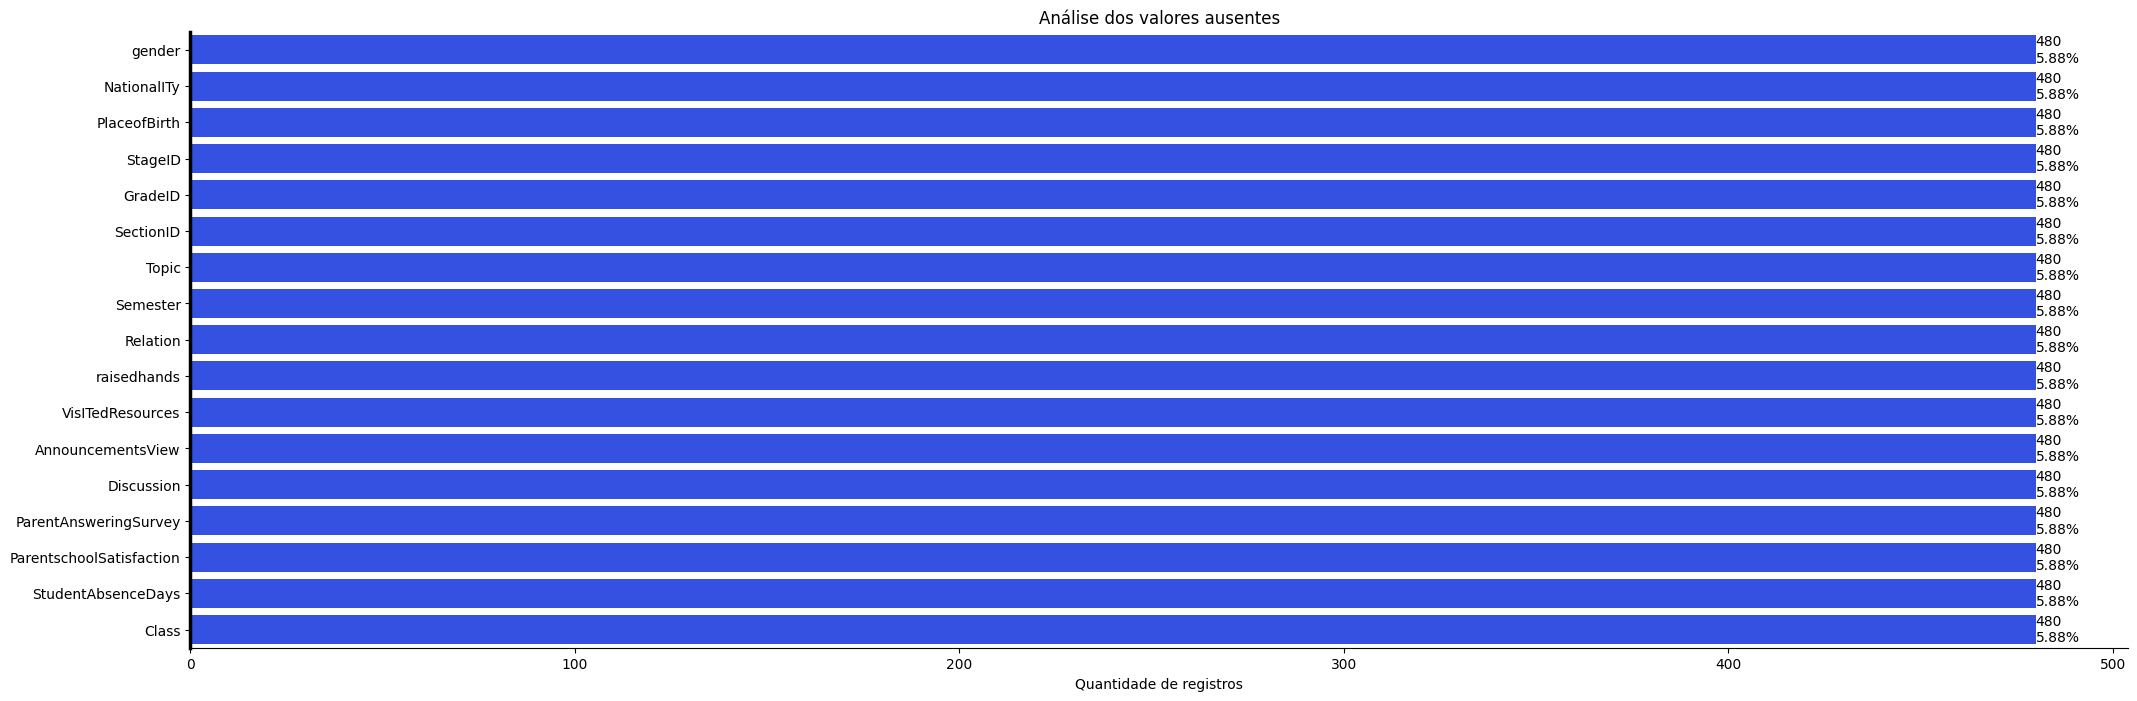

In [10]:
# Criando conjunto de dados com valores ausentes
counts = pd.DataFrame(df.count()).reset_index()
counts.columns = ['variavel', 'qnt']

# Plot do gráfico com valores ausentes
ax = sns.barplot(data=counts, y='variavel',x='qnt', color='#183EFF',alpha=1)

## Definindo tamanho do gráfico
ax.figure.set_size_inches(25, 8)

## Personalizando valores absolutos e relativos
total = float(counts['qnt'].values.sum())
for i in ax.containers:
    widths = [j.get_width() for j in i]
    total = sum(widths)
    ax.bar_label(i, label_type='edge', labels=[f"{width:.0f}\n{width/total:.2%}" for width in widths])

## Mantendo apenas as bordas da esquerda e da borda inferior
sns.despine(left=True)

## Adicionando linha para destacar o eixo y na posição 0
ax.axvline(0, color="k", clip_on=False,lw=2.5)

## Adicionando títulos
plt.title('Análise dos valores ausentes')
plt.xlabel('Quantidade de registros')
plt.ylabel('')

#não possui valores ausentes

#**Analise de Valores Discrepantes**

In [13]:
# Lista das variáveis discretas
variaveis_discretas = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

def find_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

# Loop através das variáveis discretas
for variavel in variaveis_discretas:
    # Aplicando a função para detectar outliers na variável atual
    outliers = find_outliers_IQR(df[variavel])

    # Selecionando registros considerados outliers na variável atual
    outliers_df = df[outliers]

    # Capturando os valores mínimos e máximos dos outliers na variável atual
    max_outlier = outliers_df[variavel].max()
    min_outlier = outliers_df[variavel].min()

    # Visualizando os resultados
    print(f"Registros outliers em '{variavel}':")
    print(f"Valor máximo dos outliers em '{variavel}':", max_outlier)
    print(f"Valor mínimo dos outliers em '{variavel}':", min_outlier)
    print("\n")


Registros outliers em 'raisedhands':
Valor máximo dos outliers em 'raisedhands': nan
Valor mínimo dos outliers em 'raisedhands': nan


Registros outliers em 'VisITedResources':
Valor máximo dos outliers em 'VisITedResources': nan
Valor mínimo dos outliers em 'VisITedResources': nan


Registros outliers em 'AnnouncementsView':
Valor máximo dos outliers em 'AnnouncementsView': nan
Valor mínimo dos outliers em 'AnnouncementsView': nan


Registros outliers em 'Discussion':
Valor máximo dos outliers em 'Discussion': nan
Valor mínimo dos outliers em 'Discussion': nan




#**Analise de correlação:**

In [ ]:
corr =df.corr()

<Axes: >

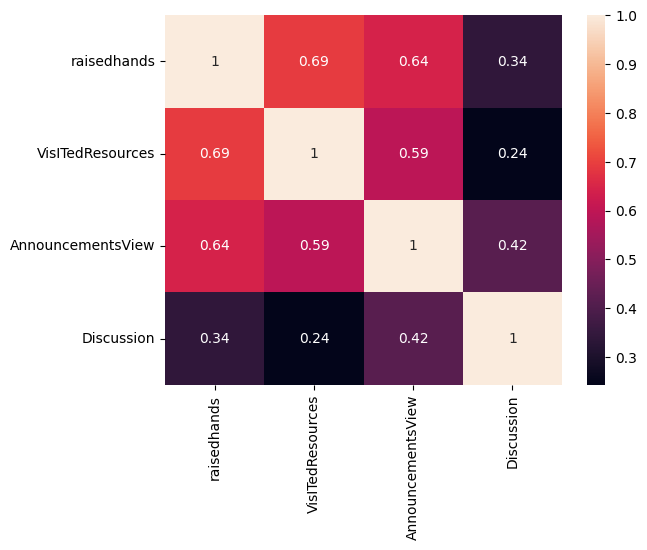

In [ ]:
sns.heatmap(corr, annot=True)

In [ ]:
#Analisando as correlações:
corr

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')